Technique 2 : Random Sampling Imputation

AIm : Random sampling imputataion consist of taking random obervations from the dataset and we use this observation to replace NAN values 

when should we use it ?
It should be used when it is assumed that the data is missing completely at random

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

In [ ]:
def impute_nana(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #This fill have a random sample for each NAN value
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  # Here the index should be same to merge the dataset random_sample to Age_random
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+"_random"]=random_sample
  




  

In [ ]:
median=df.Age.median()

In [ ]:
impute_nana(df,"Age",median)
df.head(30)
df.drop("Age_random_fixState",axis=1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

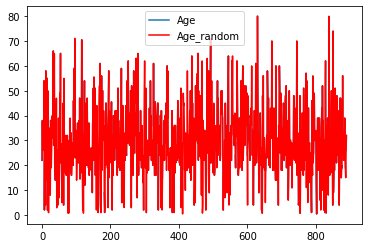

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(ax=ax)
df.Age_random.plot(ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages and disadvantages of random sampling imputataion

Advantages
1) East to implement
2) There is less distortion iin variance 

Disadvantages
1) Every situation randomness wont work mainly in business oriented scenarios

Technique 3 : Capturing NAN with a new feature 

This technique works well if the data are not missing completely at random.

In [ ]:
import pandas as pd
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


Advantages and disadvantages of cpaturing NAN with a new feature

Advantages
1) East to implemment
2) captures the importance of missing values

Disadvantage

1) It creates Additiona features (Leading to curse of dimensionality)




Technique 4 : End of distribution imputation



In [ ]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


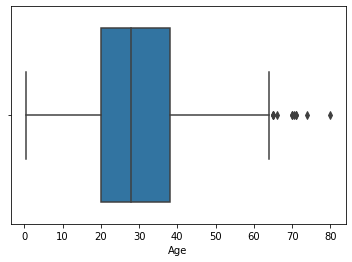

In [ ]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [ ]:
# we haave taken the 3rd right side of the distribution because the outliers 
# are in the right side shown in box plot above
extreme=df.Age.mean()+3*df.Age.std()

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,"Age",median,extreme)
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


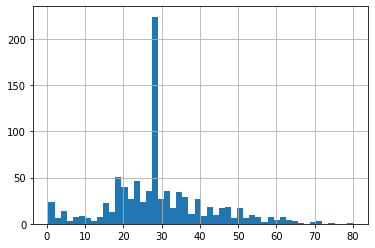

In [ ]:
df['Age'].hist(bins=50)

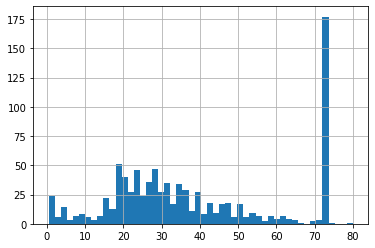

In [ ]:
df['Age_end_distribution'].hist(bins=50)

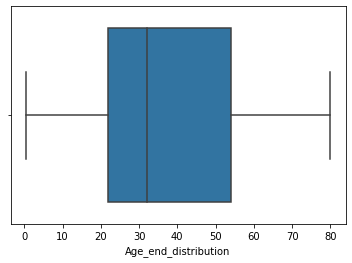

In [ ]:
sns.boxplot("Age_end_distribution",data=df)